Shape of the dataset: (7043, 21)

Columns in the dataset:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Sample data:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProt

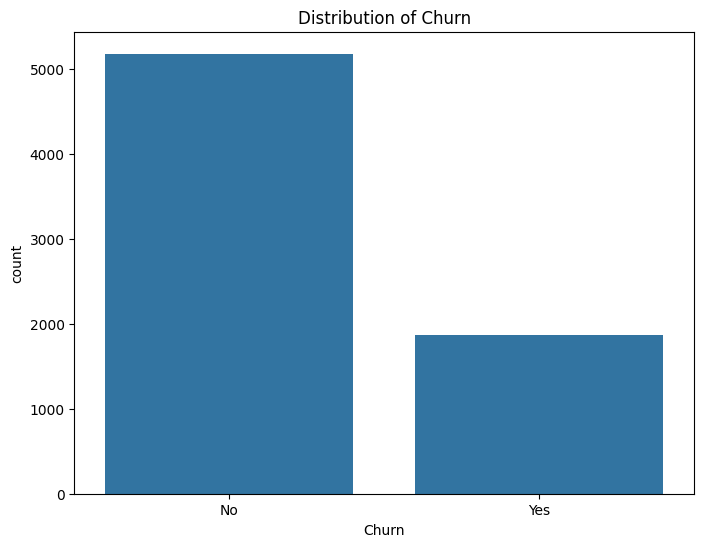

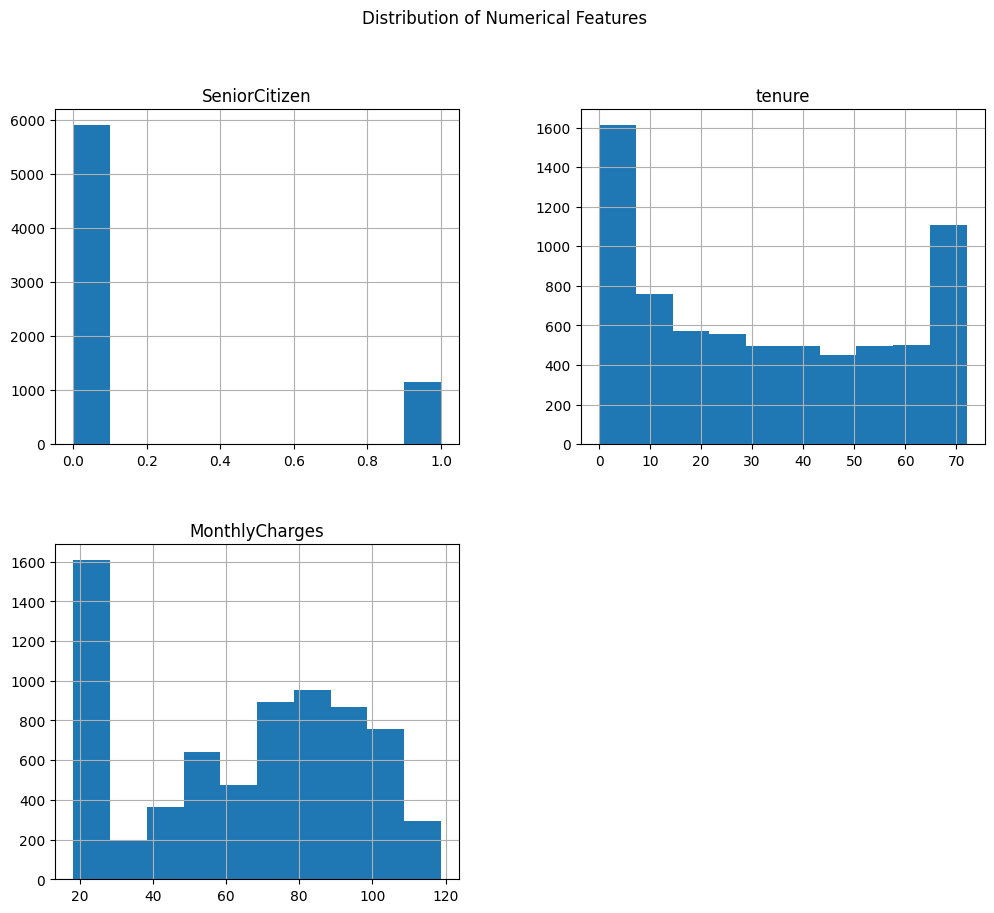

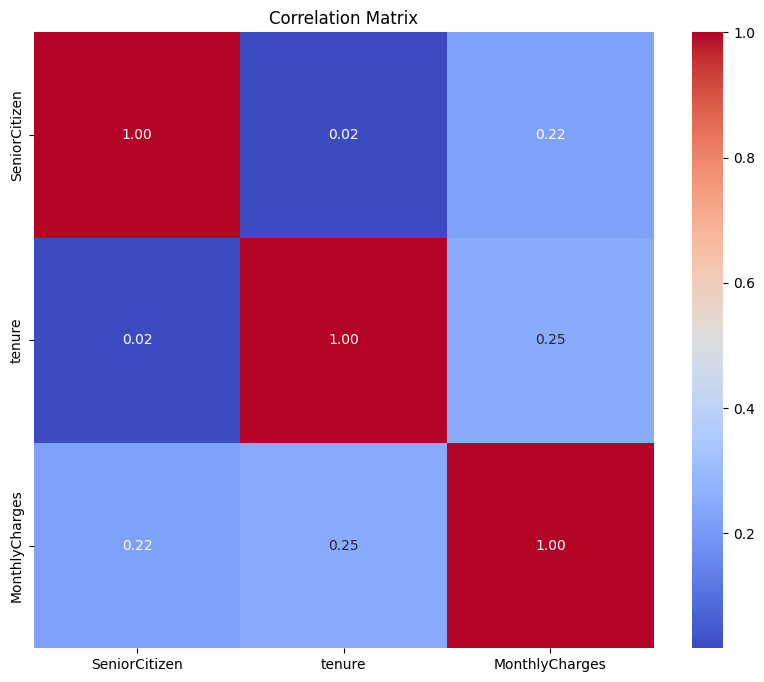

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

# Load the dataset
telco_data = pd.read_csv("telco_customer_churn.csv") 

# Display basic information about the dataset
print("Shape of the dataset:", telco_data.shape)
print("\nColumns in the dataset:")
print(telco_data.columns)
print("\nSample data:")
print(telco_data.head())

# Summary statistics
print("\nSummary statistics:")
print(telco_data.describe())

# Check for missing values
print("\nMissing values:")
print(telco_data.isnull().sum())

print("\nColumn names : ")
print(telco_data.columns.values)

print("\nColumns Data Types : ")
print(telco_data.dtypes)
# Check for duplicate rows
print("\nDuplicate rows:", telco_data.duplicated().sum())

# Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=telco_data)
plt.title('Distribution of Churn')
plt.show()

# Visualize the distribution of numerical features
numerical_features = telco_data.select_dtypes(include=[np.number]).columns.tolist()
telco_data[numerical_features].hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = telco_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()






In [36]:
# 1. Understanding Target Variable

print(100*telco_data['Churn'].value_counts()/len(telco_data['Churn']))
print(telco_data['Churn'].value_counts())
telco_base_data=telco_data.copy()

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64
No     5174
Yes    1869
Name: Churn, dtype: int64


In [37]:
# 2. Handling Missing Values
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [38]:
# 2.1 Handling Missing Values by dropping NULL containing rows
telco_data.loc[telco_data['TotalCharges'].isnull()==True]
telco_data.dropna(how='any',inplace=True)
telco_data.shape

(7032, 21)

In [39]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [40]:
telco_data.drop(columns=['customerID'],axis=1,inplace=True)
telco_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [41]:
Data=telco_data.copy()
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in telco_data.columns:
    if(telco_data[i].dtype==object):
        telco_data[i]=le.fit_transform(telco_data[i])
telco_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


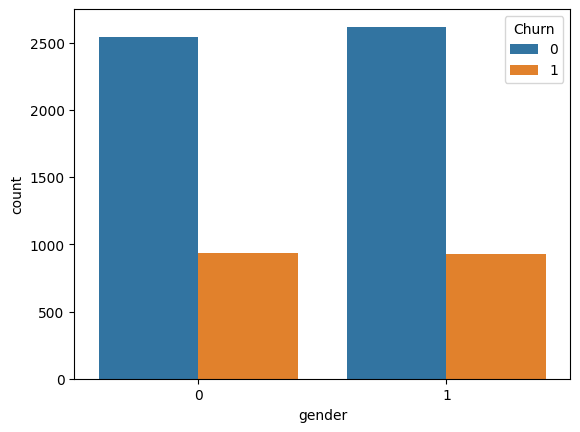

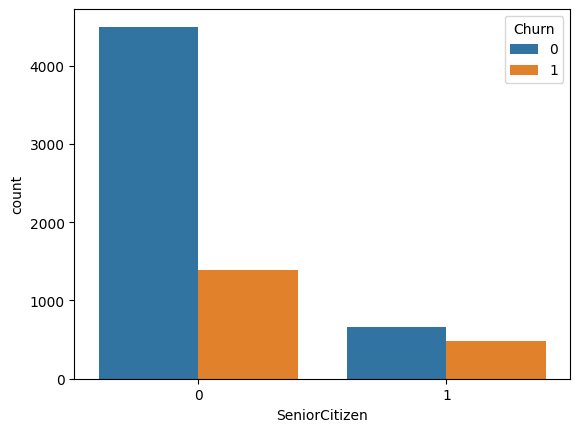

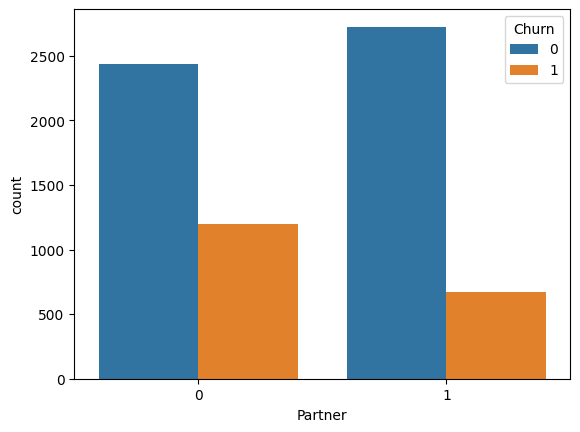

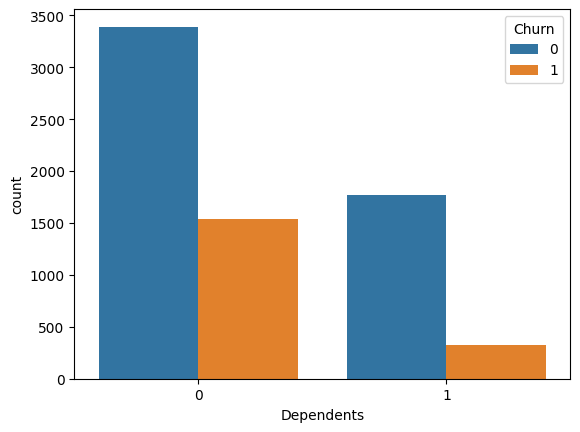

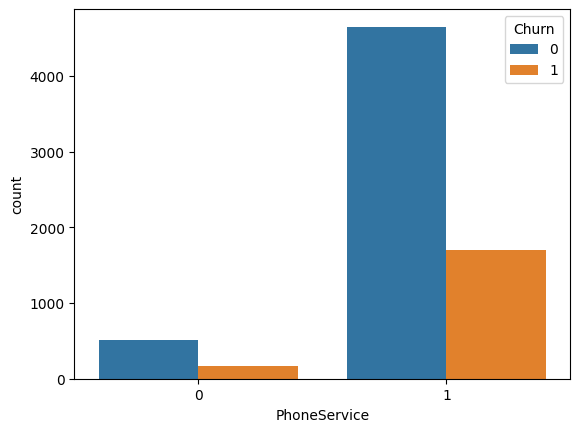

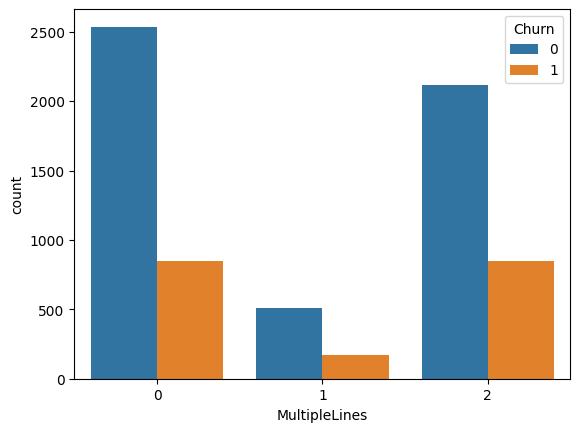

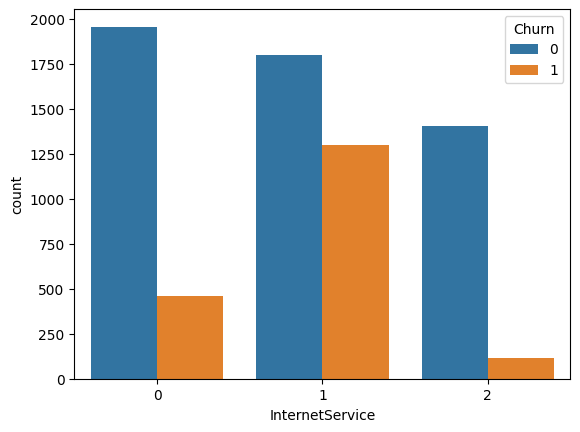

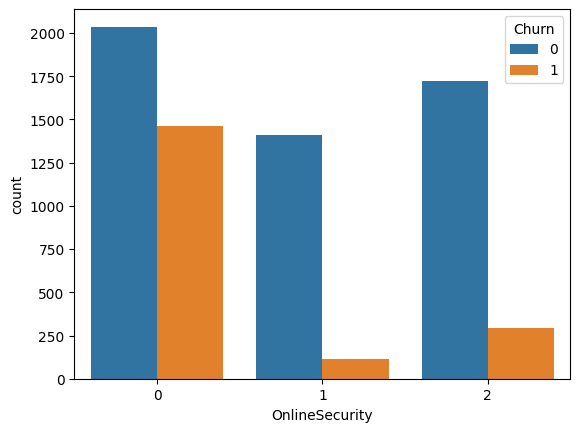

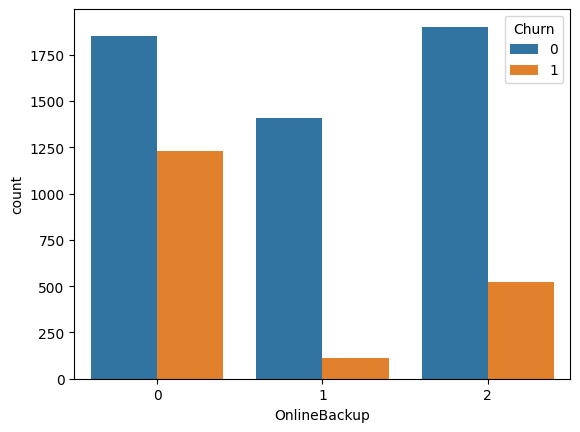

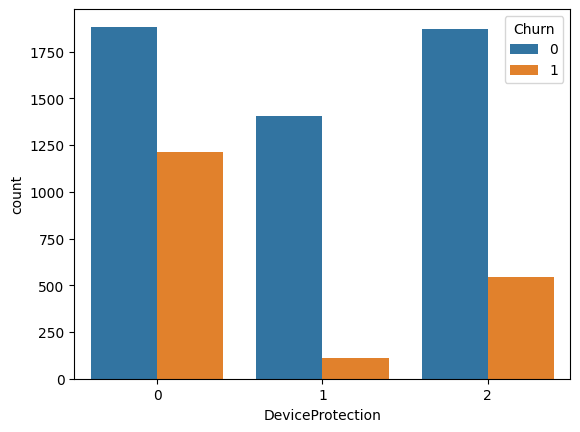

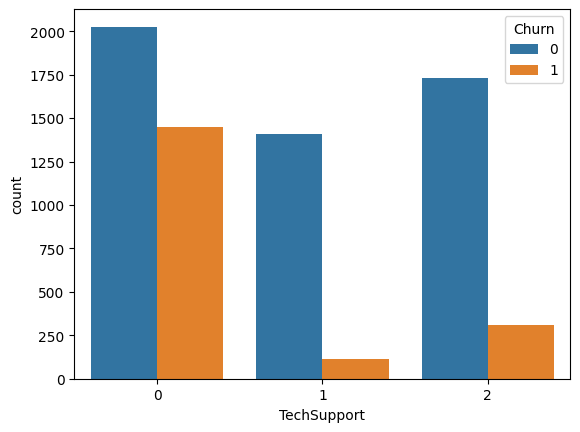

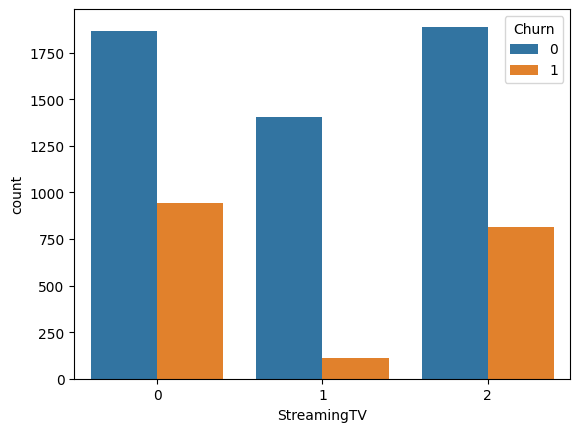

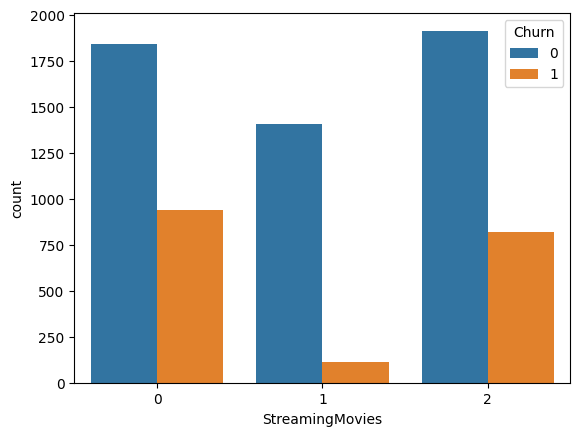

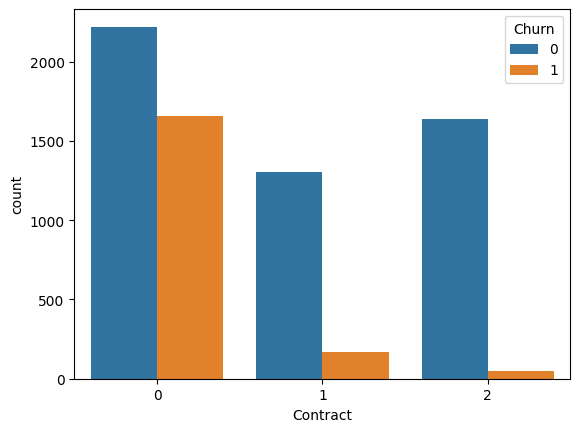

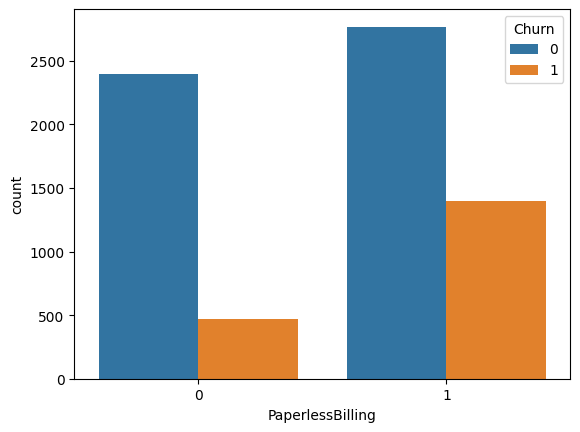

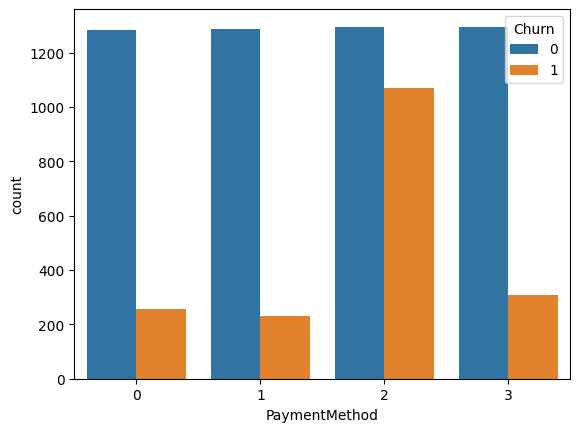

In [43]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=telco_data,x=predictor,hue='Churn')

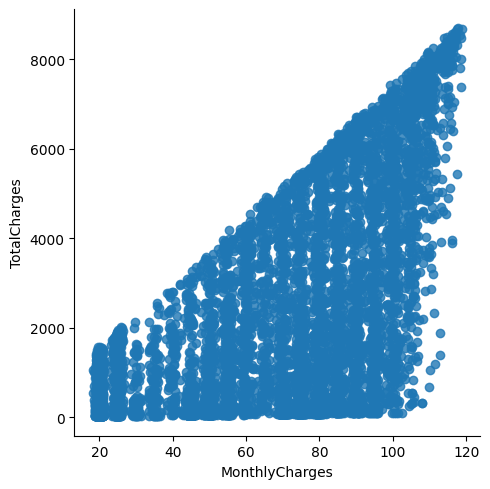

In [44]:
sns.lmplot(data=telco_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)


C:\Users\91620\AppData\Local\Temp\ipykernel_13160\1314427785.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0) ],
C:\Users\91620\AppData\Local\Temp\ipykernel_13160\1314427785.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

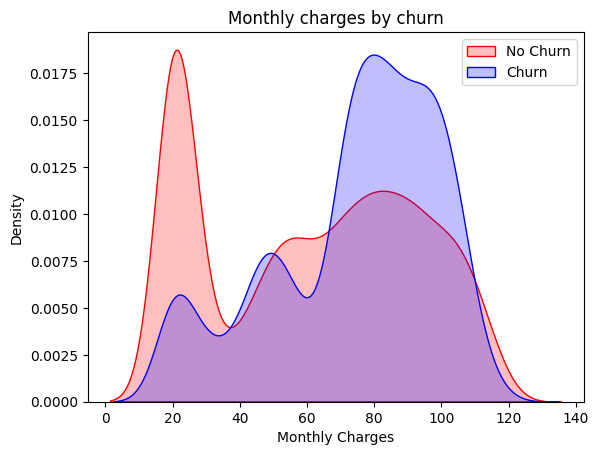

In [45]:
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\91620\AppData\Local\Temp\ipykernel_13160\2039743036.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
C:\Users\91620\AppData\Local\Temp\ipykernel_13160\2039743036.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

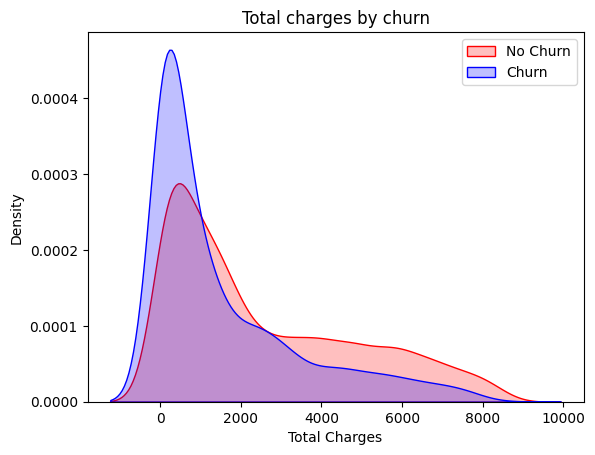

In [46]:
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

In [47]:
telco_data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


In [48]:
for i in telco_data.columns:
    if abs(telco_data["Churn"].corr(telco_data[i]))<0.15:
        telco_data.drop(columns=i,inplace=True)

telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Dependents        7032 non-null   int32  
 2   tenure            7032 non-null   int64  
 3   OnlineSecurity    7032 non-null   int32  
 4   OnlineBackup      7032 non-null   int32  
 5   DeviceProtection  7032 non-null   int32  
 6   TechSupport       7032 non-null   int32  
 7   Contract          7032 non-null   int32  
 8   PaperlessBilling  7032 non-null   int32  
 9   MonthlyCharges    7032 non-null   float64
 10  TotalCharges      7032 non-null   float64
 11  Churn             7032 non-null   int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 494.4 KB


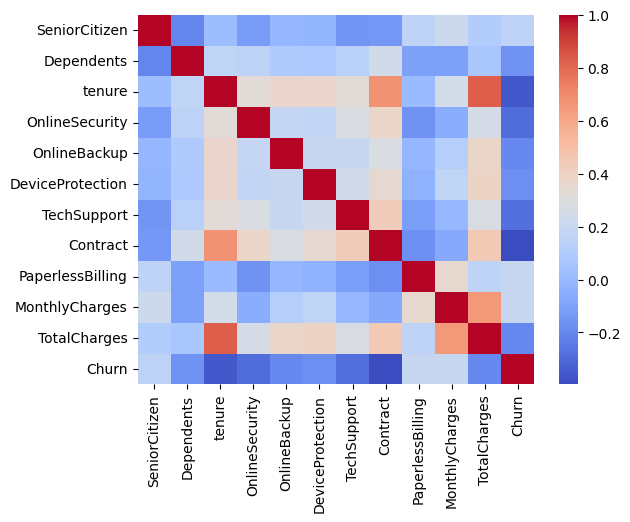

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=telco_data.corr()
heatmap=sns.heatmap(corr,cmap='coolwarm')
plt.show()

In [50]:
X=telco_data.drop("Churn",axis=1)
Y=telco_data['Churn']
df=telco_data.copy()

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)
dt.fit(X_train,Y_train)
Y_predict=dt.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,Y_predict))
print(confusion_matrix(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1033
           1       0.62      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407

[[934  99]
 [213 161]]


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
Y_rf_pred=rf.predict(X_test)
print(classification_report(Y_test,Y_rf_pred))
print(confusion_matrix(Y_test,Y_rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407

[[940  93]
 [192 182]]


In [54]:
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sm=SMOTEENN()
X_resampled,Y_resampled=sm.fit_resample(X,Y)
Xr_train,Xr_test,Yr_train,Yr_test=train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=42)
X_train_scaled = scaler.fit_transform(Xr_train)
X_test_scaled = scaler.transform(Xr_test)
print(Y_resampled.value_counts())
print(Y.value_counts())

1    3163
0    2664
Name: Churn, dtype: int64
0    5163
1    1869
Name: Churn, dtype: int64


In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)
dt.fit(X_train_scaled,Yr_train)
Yr_predict=dt.predict(X_test_scaled)
print(classification_report(Yr_test,Yr_predict))
print(confusion_matrix(Yr_test,Yr_predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       549
           1       0.91      0.93      0.92       617

    accuracy                           0.91      1166
   macro avg       0.91      0.91      0.91      1166
weighted avg       0.91      0.91      0.91      1166

[[489  60]
 [ 42 575]]


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled,Yr_train)
Yr_rf_pred=rf.predict(X_test_scaled)
print(classification_report(Yr_test,Yr_rf_pred))
print(confusion_matrix(Yr_test,Yr_rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       549
           1       0.94      0.96      0.95       617

    accuracy                           0.95      1166
   macro avg       0.95      0.95      0.95      1166
weighted avg       0.95      0.95      0.95      1166

[[511  38]
 [ 23 594]]


In [57]:
from sklearn.neural_network import MLPClassifier

# Model 6: Neural Network Classifier
print("\nModel 6: Neural Network Classifier")
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model_nn.fit(X_train_scaled, Yr_train)
yr_pred_nn = model_nn.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(Yr_test, yr_pred_nn))
print("Confusion Matrix:")
print(confusion_matrix(Yr_test, yr_pred_nn))


Model 6: Neural Network Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       549
           1       0.92      0.95      0.94       617

    accuracy                           0.93      1166
   macro avg       0.93      0.93      0.93      1166
weighted avg       0.93      0.93      0.93      1166

Confusion Matrix:
[[500  49]
 [ 32 585]]


In [58]:
from xgboost import XGBClassifier

# Model 7: XGBoost Classifier
print("\nModel 7: XGBoost Classifier")
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scaled, Yr_train)
yr_pred_xgb = model_xgb.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(Yr_test, yr_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(Yr_test, yr_pred_xgb))


Model 7: XGBoost Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       549
           1       0.95      0.97      0.96       617

    accuracy                           0.96      1166
   macro avg       0.96      0.96      0.96      1166
weighted avg       0.96      0.96      0.96      1166

Confusion Matrix:
[[518  31]
 [ 20 597]]


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define pipeline
pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier())
])

# Define parameter grid
param_grid_dt = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 10, 20, 30, 40, 50],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None]
}

# Perform GridSearchCV
grid_dt = RandomizedSearchCV(pipe_dt, param_grid_dt, cv=5)
grid_dt.fit(X_train_scaled, Yr_train)

# Print best parameters
print("Best Parameters (GridSearchCV):", grid_dt.best_params_)

# Predict on the testing set using the best model
best_classifier_dt = grid_dt.best_estimator_
yrr_pred_dt = best_classifier_dt.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(Yr_test, yrr_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(Yr_test, yrr_pred_dt))


Best Parameters (GridSearchCV): {'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__max_features': None, 'clf__max_depth': 50, 'clf__criterion': 'entropy'}

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       549
           1       0.93      0.92      0.93       617

    accuracy                           0.92      1166
   macro avg       0.92      0.92      0.92      1166
weighted avg       0.92      0.92      0.92      1166


Confusion Matrix:
[[506  43]
 [ 49 568]]


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV




# Initialize and train Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = RandomizedSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Yr_train)

# Get the best estimator
best_rf_clf = grid_search.best_estimator_

# Evaluate on test data
Yrgd_pred = best_rf_clf.predict(X_test_scaled)
print(classification_report(Yr_test, Yrgd_pred))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       549
           1       0.93      0.96      0.95       617

    accuracy                           0.94      1166
   macro avg       0.94      0.94      0.94      1166
weighted avg       0.94      0.94      0.94      1166



In [61]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=param_grid,
    n_iter=50,  # Adjust the number of iterations as needed
    cv=5,       # Adjust the number of cross-validation folds as needed
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_scaled, Yr_train)

# Print out the best parameters
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Use the best parameters to train the final XGBoost model
best_model_xgb = random_search.best_estimator_
best_model_xgb.fit(X_train_scaled, Yr_train)

# Make predictions on the test data
yr_pred_xgb = best_model_xgb.predict(X_test_scaled)

# Evaluate the final model
print("\nClassification Report:")
print(classification_report(Yr_test, yr_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(Yr_test, yr_pred_xgb))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found by RandomizedSearchCV:
{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       549
           1       0.95      0.97      0.96       617

    accuracy                           0.95      1166
   macro avg       0.95      0.95      0.95      1166
weighted avg       0.95      0.95      0.95      1166

Confusion Matrix:
[[516  33]
 [ 21 596]]


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define pipeline
pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier())
])

# Define parameter grid
param_grid_dt = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 10, 20, 30, 40, 50],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None]
}

# Perform GridSearchCV
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5)
grid_dt.fit(X_train_scaled, Yr_train)

# Print best parameters
print("Best Parameters (GridSearchCV):", grid_dt.best_params_)

# Predict on the testing set using the best model
best_classifier_dt = grid_dt.best_estimator_
yrr_pred_dt = best_classifier_dt.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(Yr_test, yrr_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(Yr_test, yrr_pred_dt))


Best Parameters (GridSearchCV): {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       549
           1       0.92      0.93      0.93       617

    accuracy                           0.92      1166
   macro avg       0.92      0.92      0.92      1166
weighted avg       0.92      0.92      0.92      1166


Confusion Matrix:
[[500  49]
 [ 43 574]]


In [63]:
telco_data

,SeniorCitizen,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,2,0,0,0,1,29.85,29.85,0
1,0,0,34,2,0,2,0,1,0,56.95,1889.50,0
2,0,0,2,2,2,0,0,0,1,53.85,108.15,1
3,0,0,45,2,0,2,2,1,0,42.30,1840.75,0
4,0,0,2,0,0,0,0,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,24,2,0,2,2,1,1,84.80,1990.50,0
7039,0,1,72,0,2,2,0,1,1,103.20,7362.90,0
7040,0,1,11,2,0,0,0,0,1,29.60,346.45,0
7041,1,0,4,0,0,0,0,0,1,74.40,306.60,1


In [64]:
for i in telco_data.columns:
    print(i)
    print(telco_data[i].unique())

SeniorCitizen
[0 1]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
OnlineSecurity
[0 2 1]
OnlineBackup
[2 0 1]
DeviceProtection
[0 2 1]
TechSupport
[0 2 1]
Contract
[0 1 2]
PaperlessBilling
[1 0]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn
[0 1]


In [65]:
for i in Data.columns:
    print(i)
    print(Data[i].unique())

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   

In [66]:
# Taking user input:
sen=input("Enter Yes If Customer is Senior Citizen else Enter No: ")
if sen.lower()=="yes":
    senior=1
elif sen.lower()=="no":
    senior=0
else:
    senior=0
dep=input("Enter Customer's Dependency (Yes or No): ")
if dep.lower()=="yes":
    depend=1
elif dep.lower()=="no":
    depend=0
else:
    depend=0

tenure=int(input("Number of Months the customer has Stayed: "))
ois=input("Whether Customer has Online Security or not (Yes, No or No internet sevice): ")
if ois.lower()=="yes":
    OnlineSecurity=2
elif ois.lower()=="no":
    OnlineSecurity=0
else:
    OnlineSecurity=1
    
oib=input("Whether the customer has Online Backup or Not (Yes, No or No internet Service): ")
if oib.lower()=="yes":
    OnlineBackup=2
elif oib.lower()=="no":
    OnlineBackup=0
else:
    OnlineBackup=1
    
dvp=input("Whether Custom has Device Protection or not (Yes, No or No internet service): ")
if dvp.lower()=="yes":
    DeviceP=2
elif dvp.lower()=="no":
    DeviceP=0
else:
    DeviceP=1
ts=input("Whether Custom has Tech Support or not (Yes, No or No internet service): ")
if ts.lower()=="yes":
    TechS=2
elif ts.lower()=="no":
    TechS=0
else:
    TechS=1
con=input("Contract Term of the Customer (Month-to-Month, One Year or Two Year): ")
if con.lower()=="month-to-month":
    Contract=0
elif con.lower()=="one year":
    Contract=1
elif con.lower()=="two year":
    Contract=2
else:
    Contract=0

plb=input("Whether the customer has Paperless Billing or Not (Yes or No): ")
if plb.lower()=="yes":
    Bill=1
elif plb.lower()=="two year":
    Bill=0
else:
    Bill=1
    
month=float(input("The amount charged to the Customer Monthly: "))
total=float(input("Total Amount charged to the customer: "))

X_input=[senior,depend,tenure,OnlineSecurity,OnlineBackup,DeviceP,TechS,Contract,Bill,month,total]

X_input_df=pd.DataFrame([X_input])
X_input_df




,0,1,2,3,4,5,6,7,8,9,10
0,1,0,43,2,2,0,0,1,1,45.76,500.0


In [71]:
X_input_df.columns=["SeniorCitizen","Dependents","tenure","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","Contract","PaperlessBilling","MonthlyCharges","TotalCharges"]
X_input_df


,SeniorCitizen,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,1,0,43,2,2,0,0,1,1,45.76,500.0


In [72]:
X_input_scaled=scaler.transform(X_input_df)
X_input_scaled

Y_input_pred=model_xgb.predict(X_input_scaled)
if Y_input_pred[0]==0:
    predicted="No"
else:
    predicted="Yes"
print("Churn Prediction: ",predicted)

Churn Prediction:  No


In [73]:
telco_data.head()

,SeniorCitizen,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,2,0,0,0,1,29.85,29.85,0
1,0,0,34,2,0,2,0,1,0,56.95,1889.50,0
2,0,0,2,2,2,0,0,0,1,53.85,108.15,1
3,0,0,45,2,0,2,2,1,0,42.30,1840.75,0
4,0,0,2,0,0,0,0,0,1,70.70,151.65,1


In [75]:
with open('model.pkl','wb') as files:
    pickle.dump(model_xgb,files)
    

In [77]:
import numpy as np
inp=np.array(X_input_df)
inp

array([[  1.  ,   0.  ,  43.  ,   2.  ,   2.  ,   0.  ,   0.  ,   1.  ,
          1.  ,  45.76, 500.  ]])